# Linear Models
Part 1 of the Lecture: Why are linear models "machine learning" but insufficient for most problems?

In [1]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np
import os

In [2]:
np.random.seed(123)

Configuration variables

In [3]:
n_points = 32

## Linear Regression
Illustrative examples using Linear Regression

### Case 1: Actually Linear Data
Fitting linear regression to data that shows a linear trend

In [4]:
X = np.random.uniform(0, 10, (n_points, 1))  # 2D array with one column

In [5]:
y = 2 * X + 1 + np.random.normal(size=(n_points, 1))

In [6]:
lr = LinearRegression().fit(X, y)

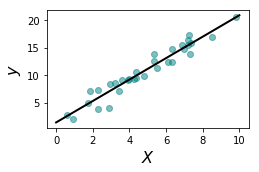

In [7]:
fig, ax = plt.subplots()

x_plot = np.linspace(0, 10, 128)[:, None]  # Makes a 2D array
ax.scatter(X, y, color='teal', alpha=0.5)
ax.plot(x_plot, lr.predict(x_plot), 'k', lw=2)

ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)

fig.set_size_inches(3.7, 2.5)
fig.tight_layout()
fig.savefig(os.path.join('figures', 'linear-regression.svg'), transparent=True)

### Case 2: Data is Nonlinear
Showing the unsurprisingly limitations of linear regression for non-linear data

In [8]:
y = -0.6 * X * (X - 11) + np.random.normal(size=(n_points, 1))

Showing linear regression

In [9]:
lr = LinearRegression().fit(X, y)

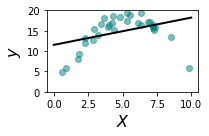

In [10]:
fig, ax = plt.subplots()

x_plot = np.linspace(0, 10, 128)[:, None]  # Makes a 2D array
ax.scatter(X, y, color='teal', alpha=0.5)
ax.plot(x_plot, lr.predict(x_plot), 'k', lw=2)

ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_ylim(0, 20)

fig.set_size_inches(3, 2)
fig.tight_layout()
fig.savefig(os.path.join('figures', 'linear-regression-fails-quadratic.svg'), transparent=True)

Showing polynomial regression of degree 10

In [11]:
pr = Pipeline([
    ('poly', PolynomialFeatures(degree=10)),
    ('lr', LinearRegression())
]).fit(X, y)

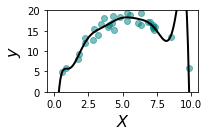

In [12]:
fig, ax = plt.subplots()

x_plot = np.linspace(0, 10, 128)[:, None]  # Makes a 2D array
ax.scatter(X, y, color='teal', alpha=0.5)
ax.plot(x_plot, pr.predict(x_plot), 'k', lw=2)

ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_ylim(0, 20)

fig.set_size_inches(3, 2)
fig.tight_layout()
fig.savefig(os.path.join('figures', 'polynomial-regression-overfitting.svg'), transparent=True)

## Logistic Regression
Some examples illustrating Logistic Regression to classify samples

### Case 1: Linearly-Separable Data
Showing logistic regression on a simple, linearly-separable set

In [13]:
y = (X > 5).astype('int')  # Puts a decision surface at x == 5

In [14]:
lr = LogisticRegression().fit(X, y)

C:\Users\Logan\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Logan\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


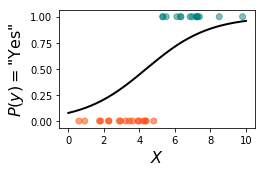

In [15]:
fig, ax = plt.subplots()

x_plot = np.linspace(0, 10, 128)[:, None]  # Makes a 2D array
ax.scatter(X, y, color=['teal' if yi else 'orangered' for yi in y], alpha=0.5)
ax.plot(x_plot, lr.predict_proba(x_plot)[:, 1], 'k', lw=2)

ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$P(y)=$"Yes"', fontsize=16)

fig.set_size_inches(3.7, 2.5)
fig.tight_layout()
fig.savefig(os.path.join('figures', 'logistic-regression.svg'), transparent=True)

### Case 2: Non-linearly separable data
Show that simple Logistic Regression doesn't work here

In [16]:
y = np.logical_or(X > 7, X < 3).astype('int')  # Puts a decision surface at x == 5

In [17]:
lr = LogisticRegression().fit(X, y)

C:\Users\Logan\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Logan\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


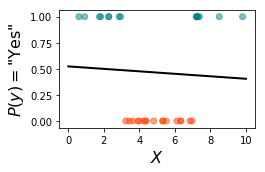

In [18]:
fig, ax = plt.subplots()

x_plot = np.linspace(0, 10, 128)[:, None]  # Makes a 2D array
ax.scatter(X, y, color=['teal' if yi else 'orangered' for yi in y], alpha=0.5)
ax.plot(x_plot, lr.predict_proba(x_plot)[:, 1], 'k', lw=2)

ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$P(y)=$"Yes"', fontsize=16)

fig.set_size_inches(3.7, 2.5)
fig.tight_layout()
fig.savefig(os.path.join('figures', 'logistic-regression-failure.svg'), transparent=True)